In [76]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math

In [77]:
class BSTNode:
  def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

def BSTSearch(node, value):
  if node == None:
    return None

  if value > node.value:
    return BSTSearch(node.right, value)

  if value < node.value:
    return BSTSearch(node.left, value)

  return node.value

def BSTInsert(root, value):
  node = BSTNode(value)
  return BSTInsertNode(root, node)

def BSTInsertNode(root, node):
  if root == None:
    return node

  if node.value == root.value:
    return root
  elif node.value < root.value:
    root.left = BSTInsertNode(root.left, node)
  elif node.value > root.value:
    root.right = BSTInsertNode(root.right, node)

  return root

def BSTHeight(node):
    if node == None:
        return 0
    return BSTGetHeight(node)

def BSTGetHeight(node):
    if node == None:
        return 0

    return 1 + max(BSTGetHeight(node.left), BSTGetHeight(node.right))


In [78]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self, tree):
        y = self.left
        self.left = y.right
        if y.right != None:
          y.right.parent = self
        y.parent = self.parent
        if self.parent == None:
          tree.root = y
        elif self == self.parent.right:
          self.parent.right = y
        else:
          self.parent.left = y
        y.right = self
        self.parent = y

        return tree

    def rotate_left(self, tree):
        y = self.right
        self.right = y.left
        if y.left != None:
          y.left.parent = self
        y.parent = self.parent
        if self.parent == None:
          tree.root = y
        elif self == self.parent.left:
          self.parent.left = y
        else:
          self.parent.right = y
        y.left = self
        self.parent = y
        return tree


In [79]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
             self = self.__insert(self.root, value)
        return self

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self = self.fix(node.left)

            else:
                self = self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self = self.fix(node.right)
            else:
                self = self.__insert(node.right, value)

        return self

    def fix(self, node):
        if node.parent == None:
            node.make_black()
        while node != None and node.parent != None and node.parent.is_red() and node.is_red():
            #if there are two red nodes in a row
            P = node.parent
            C = node
            G = P.parent
            U = C.get_uncle()

            if U == None:
              #check if the nodes are in a straight line or not and rotate/double rotate accordingly
              if P.is_right_child() and C.is_right_child():
                #rotate left G
                #G = red, P = black
                self = G.rotate_left(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_left_child():
                #rotate right G
                #G = red, P = black
                self = G.rotate_right(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_right_child():
                #rotate left P
                #rotate right G
                #C = black, G = red

                self = P.rotate_left(self)
                self = G.rotate_right(self)

                C.make_black()
                G.make_red()

              elif P.is_right_child() and C.is_left_child():
                #rotate right P
                #rotate left G
                #C = black, G = red
                self = P.rotate_right(self)
                self = G.rotate_left(self)

                C.make_black()
                G.make_red()
            elif U.is_black():
              #check if the nodes are in a straight line or not and rotate/double rotate accordingly
              if P.is_right_child() and C.is_right_child():
                #rotate left G
                #G = red, P = black
                self = G.rotate_left(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_left_child():
                #rotate right G
                #G = red, P = black
                self = G.rotate_right(self)

                G.make_red()
                P.make_black()
              elif P.is_left_child() and C.is_right_child():
                #rotate left P
                #rotate right G
                #C = black, G = red
                self = P.rotate_left(self)
                self = G.rotate_right(self)

                C.make_black()
                G.make_red()
              elif P.is_right_child() and C.is_left_child():
                #rotate right P
                #rotate left G
                #C = black, G = red
                self = P.rotate_right(self)
                self = G.rotate_left(self)

                C.make_black()
                G.make_red()
            else:
              #G = red
              #P = black, U = black
              G.make_red()
              P.make_black()
              U.make_black()

            if G.parent != None:
              if G.is_red() and G.parent.is_red():
                self = self.fix(G)

        self.root.make_black()
        return self

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


In [82]:
def draw_show_plot(run_arr, ylabel, title):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize = (20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr), color = "red", linestyle="--", label = "Avg")
    plt.xlabel("Test #")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

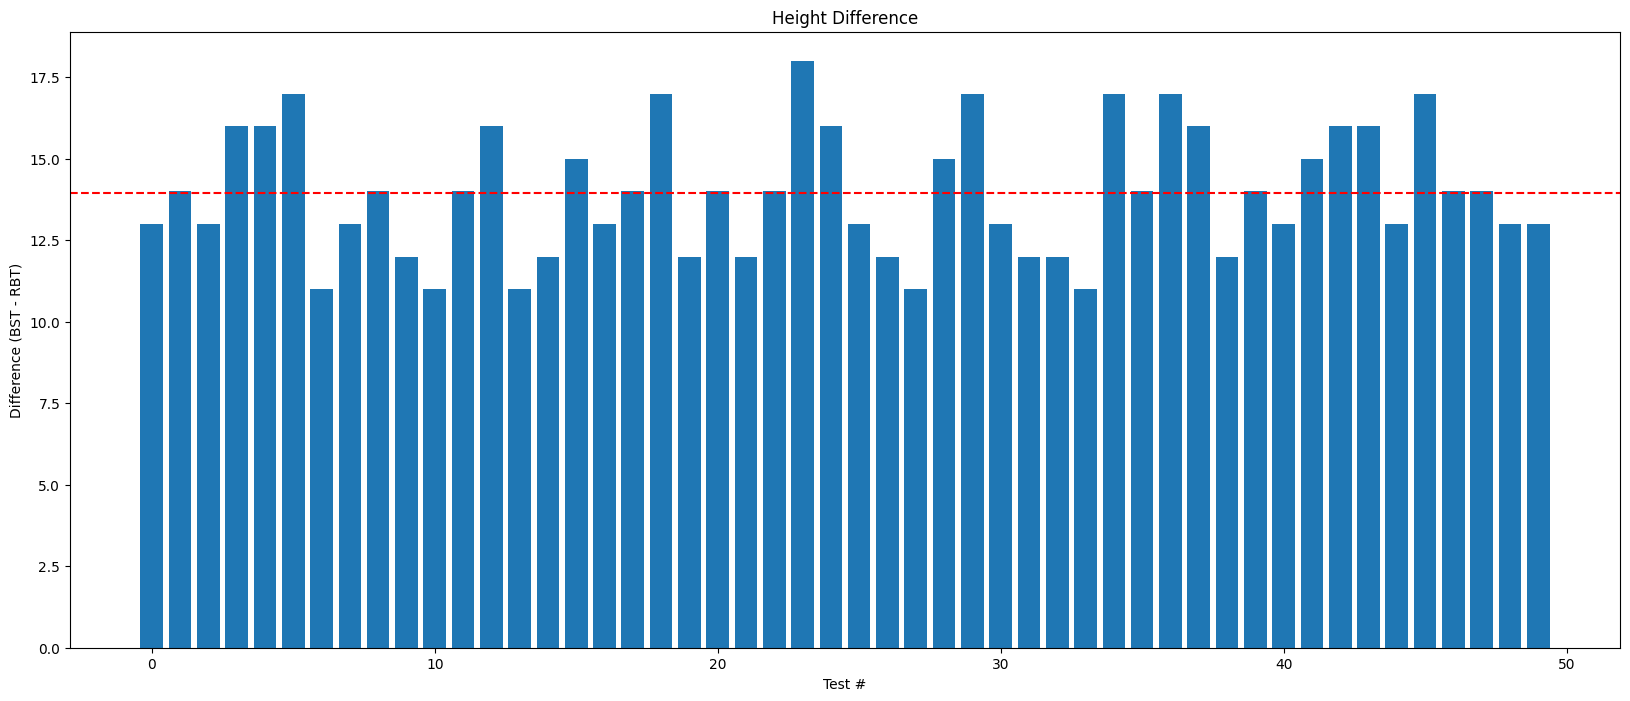

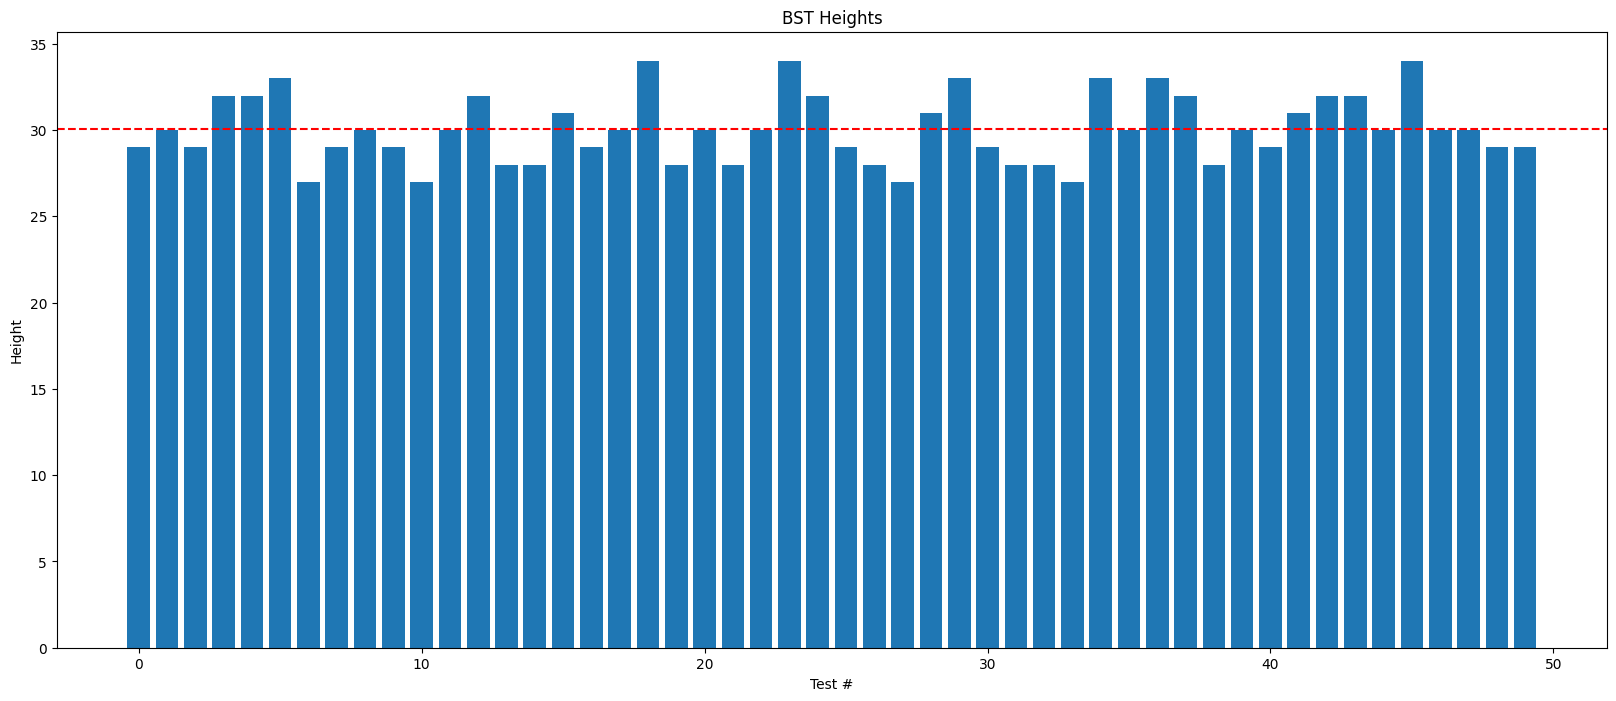

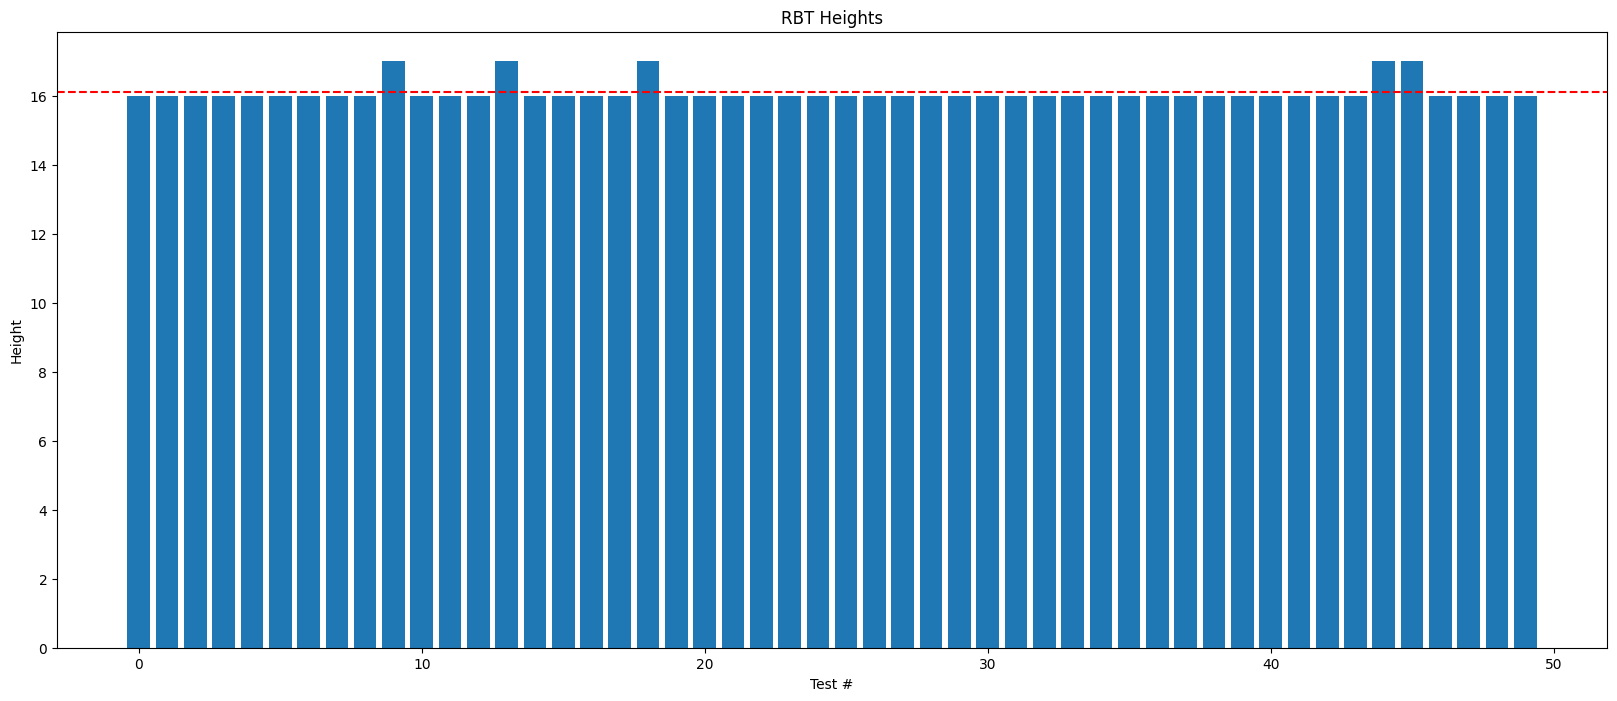

In [83]:
#50 random lists will be generated
runs = 50
#the 50 differences in height (BST height - RBT height) will be stored in differences to print later
differences = []
BSTHeights = []
RBTHeights = []

for _ in range(runs):
  #generate a random number between 1 and 20,000 to create the BST and RBT
  temp = random.randrange(1, 20000)
  BST = BSTNode(temp)
  RBT = RBTree()
  RBT.insert(temp)

  #generate the remaining random 9999 numbers and add them to both trees
  for _ in range(9999):
    temp = random.randrange(1, 20000)
    RBT.insert(temp)
    BSTInsert(BST, temp)

  bstheight = BSTHeight(BST)
  rbtheight = RBT.get_height()

  differences.append(bstheight - rbtheight)
  BSTHeights.append(bstheight)
  RBTHeights.append(rbtheight)

# print(differences)
draw_show_plot(differences, "Difference (BST - RBT)", "Height Difference")
draw_show_plot(BSTHeights, "Height", "BST Heights")
draw_show_plot(RBTHeights, "Height", "RBT Heights")

**Reflection**

Outline of Experiment:
- 10 000 random integers between 1 and 20,000 are generated and inserted into both a red-black tree and a binary search tree.
- After all of the integers have been added to the trees, the difference in their heights is found using (height of BST) - (height of RBT), as the BST should have a larger height since RBTs are self-balancing.
- This is repeated 50 times to find the average height difference, as well as the average heights of the trees.

Results:
- It can be seen in the three graphs that on average, the height of an RBT with 10 000 elements is 14 less than the height of a BST with the same elements.
- On average, the heights for the BSTs were around 30, while the heights for the RBTs were around 14.

Why is this difference important? How can this be used to select between RBTs and BSTs?
- This difference is important as it shows that depending on the input values, BSTs can start to lean towards their worst case easily, making them more comparable to a list and reducing the usefullness of the tree/binary search. This can be seen as their heights were twice the size of the RBT heights.
- Since RBTs are self-balancing, they keep their perfect black balance, so searching through them is always more efficient. They never start approaching linear time as regular BSTs do.
- This can be used to select between RBTs and BSTs as it can clearly be seen that RBTs will continue to maintain balance, no matter the size of the tree, so searching and inserting will always be faster, whereas with BSTs the balance is easily lost, and it only gets worse as more elements are added. This makes red-black trees a better option.